Kaggle - Drug Pharma New Dataset 
The "Drug Pharma New Dataset" is a comprehensive and up-to-date collection of pharmaceutical drugs registered by the Drug Administration of Bangladesh (DGDA). This dataset spans five major drug categories: Allopathic, Unani, Ayurvedic, Homeopathic, and Herbal. It serves as a valuable resource for researchers, data analysts, and anyone interested in the pharmaceutical industry, offering a detailed overview of the variety of drugs registered for medical use.
More information can be found on the kaggle website. - 
I mainly focused on the Allopathic Medicine. 

In [1]:
# Imports for data analysis and plotting

# Path for where the dataset is downloaded in cache
from pathlib import Path
import os
# Getting The Dataset
import kagglehub
# Table
import pandas as pd
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
# Encoding
import chardet


In [2]:
home_dir = Path("C:/") if  Path("C:/").exists() else Path.home()
os.chdir(home_dir)

In [3]:
# Download latest version of the kaggle dataset
path = kagglehub.dataset_download("shuvokumarbasak2030/drug-pharma-new-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\subre\.cache\kagglehub\datasets\shuvokumarbasak2030\drug-pharma-new-dataset\versions\1


In [4]:
# Different encoding and figuring out which encoding needed for the csv file

with open(f"{path}\dgda_drug_database_data\csv_all_drug_file\Homeopathic_Drug_Database.csv", "rb") as f:
    raw_data = f.read(1000000)

result = chardet.detect(raw_data)
print(f"Detected Encoding for Homeopathic: {result['encoding']} (Confidence: {result['confidence']})")

Detected Encoding for Homeopathic: ISO-8859-1 (Confidence: 0.73)


In [5]:
# Reading all the csv files into their own dataframes
Allopathic = pd.read_csv(f"{path}\dgda_drug_database_data\csv_all_drug_file\Allopathic_Drug_Database.csv")
Ayurvedic = pd.read_csv(f"{path}\dgda_drug_database_data\csv_all_drug_file\Ayurvedic_Drug_Database.csv")
Herbal = pd.read_csv(f"{path}\dgda_drug_database_data\csv_all_drug_file\Herbal_Drug_Database.csv")
Homeopathic = pd.read_csv(f"{path}\dgda_drug_database_data\csv_all_drug_file\Homeopathic_Drug_Database.csv", encoding = "ISO-8859-1")
Unani = pd.read_csv(f"{path}\dgda_drug_database_data\csv_all_drug_file\\Unani_Drug_Database.csv")

In [6]:
# A function to create a new mapping from a previous string
def categorize(old,mapping) -> str:
    '''
    Returns the new mapping of a string

    Args:
        old: the old mapping we used
        mapping: the mapping we want to apply to the dataframe column
    
    Returns:
        The new mapping unless we haven't specified
    '''

    for new_category, old_category in mapping.items():
        if old in old_category:
            return new_category
    return "Unknown"

In [7]:
Allopathic.isna().sum()

SL                          0
Name of the Manufacturer    0
Brand Name                  3
Generic Name                0
Strength                    0
Dosages Description         0
Use For                     0
DAR                         0
dtype: int64

In [8]:
# There are 143 unique Dosages Descriptions will try to combine all of them into less categories

# dosages_descrp = Allopathic["Dosages Description"].unique()
# print(dosages_descrp)

# Found a spelling error
#print(Allopathic["Dosages Description"].where(Allopathic["Dosages Description"] == 'Solution Fo Root Cannel').dropna())
Allopathic.loc[35211, 'Dosages Description'] = 'Solution For Root Cannel'

# Mapping I created by AI to help map all 143 unique dosage descriptions. There also seems to be some overlap left by the AI
# since it wasn't descriptive enough for it. I Left it alone since I do have a lack in knowledge about medical science.
# Although I will say This definitly needs to be fixed, Since Ai definitly made mistakes that I notice easily like Syringe being
# under oral. I did fix some of them but it would take too long, and I didnt want to fully focus on this.
category_map = {
    'Oral Dosage': [
        'Tablet', 'Capsule', 'Syrup', 'Oral Solution', 'Oral Suspension', 'Oral Gel', 'Chewable Tablet', 'Oral Powder',
        'Oral Liquid', 'Oral Emulsion', 'Sachet', 'Sached Powder', 'Paediatric Drops', 'Oral Saline', 'Oral Paste',
        'Oral Drops', 'Granules For Suspension', 'Mups Tablet', 'Dispersible Tablet', 'Orodispersible Tablet',
        'Oral Soluble Film', 'Effervescent Tablet', 'Mouth Dissolving Tablet', 'Effervescent Granules', 'Powder for Pedriatric Drop',
        'Powder for Solution', 'Oral Granules', 'Powder For Oral Solution', 'Mouth Wash Antiseptic', 'Oral Dental Gel',
        'Rapid Tablet', 'Elixir', 'Linctus', 'Mouth Wash', 'Syringe', 'Powder For Suspension',
        'Extended Release Capsule', 'Er Capsule', 'Cr Capsule', 'Md Tablet', 'Water Soluble Powder'
    ],
    'Topical Dosage': [
        'Lotion', 'Cream', 'Ointment', 'Gel', 'Emulsion', 'Topical Solution', 'Vaginal Cream', 'Eye Ointment',
        'Scalp Lotion', 'Scalp Ointment', 'Eye Gel', 'Vaginal Gel', 'Vaginal Suppository', 'Rectal Ointment',
        'Topical Suspension', 'Eye & Nasal Drops', 'Eye Cleanser Solution', 'Eye and Ear Ointment', 'Shampoo'
    ],
    'Injectable Dosage': [
        'IV Infusion', 'IV Injection', 'IM Injection', 'Injection', 'Solution for Injection', 'Solution For Infusion',
        'Solution For Injection', 'Water For Injection', 'Dialysis Solution', 'IV/IM Injection'
    ],
    'Inhalation Dosage': [
        'Inhaler', 'Aerosol Inhalation', 'Inhalation Solution', 'Dry Powder Inhaler', 'Nebuliser Solution',
        'Nebuliser Suspension', 'Inhalation Liquid', 'Metered Dose Inhaler', 'Hfa Inhaler', 'Inhalation Aerosol',
        'Inhalation Capsule', 'Respirator Suspension'
    ],
    'Other Dosage': [
        'Suspension', 'Bolus', 'Powder for Suspension', 'Suspension', 'Drops', 'Tincture', 'Implant', 'Mouth Wash',
        'Suppository', 'Eye and Ear Drops', 'Eye Drops', 'Gargle & Mouth Wash', 'Vaginal Tablet', 'Dr Tablet', 'Cozycap',
        'Dispersible Tablet', 'Dr Granules For Suspension', 'Soft Gelatin Capsule', 'Pr Tablet', 'Er Tablet', 'Cr Tablet',
        'Xr Tablet', 'Ors Tablet', 'Sr Tablet', 'Sr Capsule', 'Odt Tablet', 'Mups Tablet', 'Vaginal Pessary', 'Spray',
        'Nasal Spray', 'Nasal Drops', 'Sprinkle Capsule', 'M R Capsule', 'M R Tablet', 'Root Canal Agent', 'Canal Irrigation',
        'Solution For Root Cannel', 'Repacking', 'Eye Solution', 'Per Rectal', 'Blood bag', 'Pvc Bag',
        'Needle for Syringe', 'Butterfly', 'Gas', 'Scrub', 'Blood Tubing Set', 'Eye Solution', 'Viscoelastic Solution',
        'Cervical Gel', 'Gum', 'Pellets', 'Raw Materials', 'Irrigation Solution', 'Pellets For Suspension',
        'Ear Drop', 'Ophthalmic Emulsion', 'Resperitory Solution', 'Emulgel', 'Combipack', 'Delayed Release Capsule',
        'Ear Spray', 'Mouth Wash Antiseptic', 'Water Soluble Powder', 'Pour On (Solution)', 'Hand Rub', 'Eye, Ear & Nasal Drops'
    ],
    'Unknown': [
        'Unknown', 'Other', 'Miscellaneous', 'Not Specified', 'Liquid', 'Solution', 'Gas', 'Powder'
    ]
}


# Creation of a new column that concatenates the dosage description
Allopathic["Dosages_Description_Concate"] = Allopathic["Dosages Description"].apply(categorize, args = (category_map,))

In [9]:
temp = Allopathic.where(Allopathic['Dosages_Description_Concate'] == "Unknown").dropna()
temp["Dosages Description"].unique()

array(['Solution', 'Powder', 'Liquid'], dtype=object)

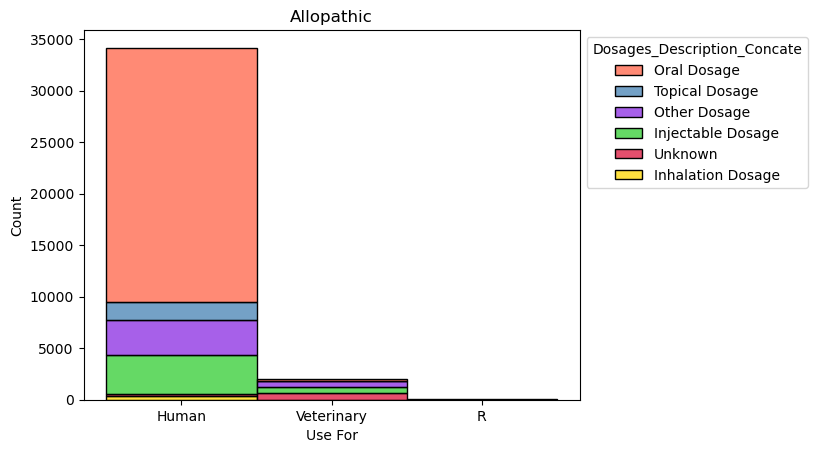

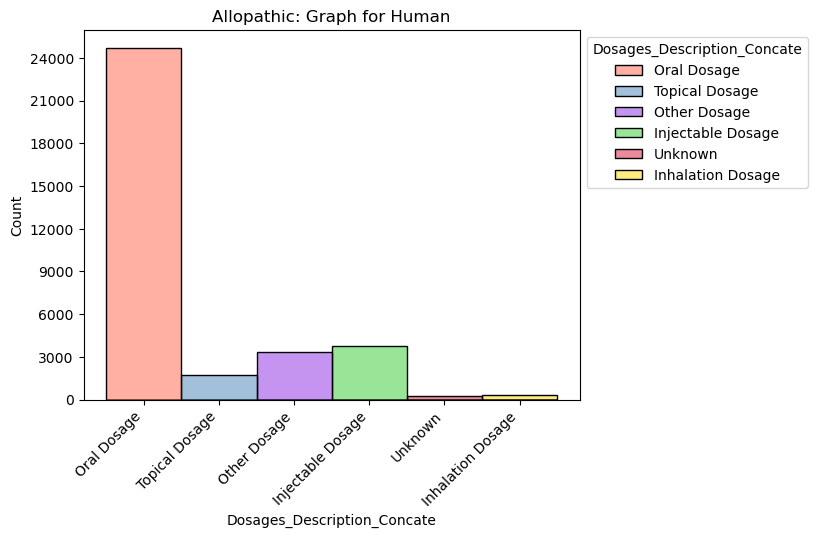

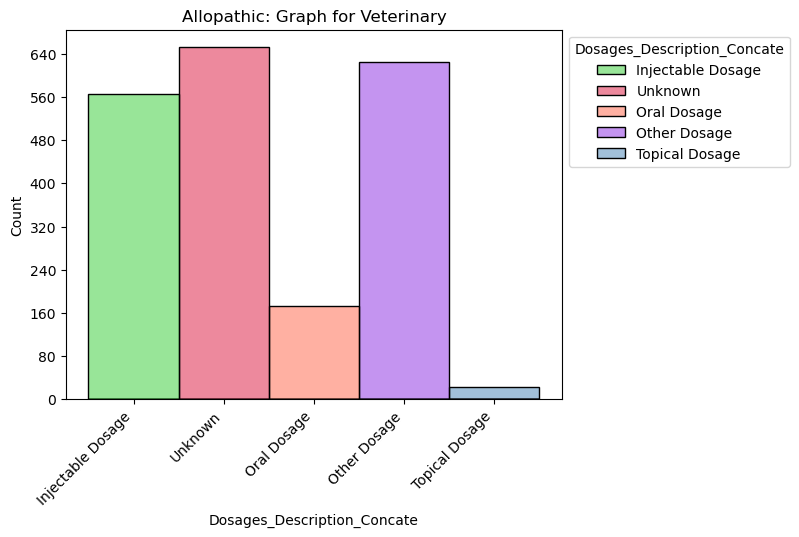

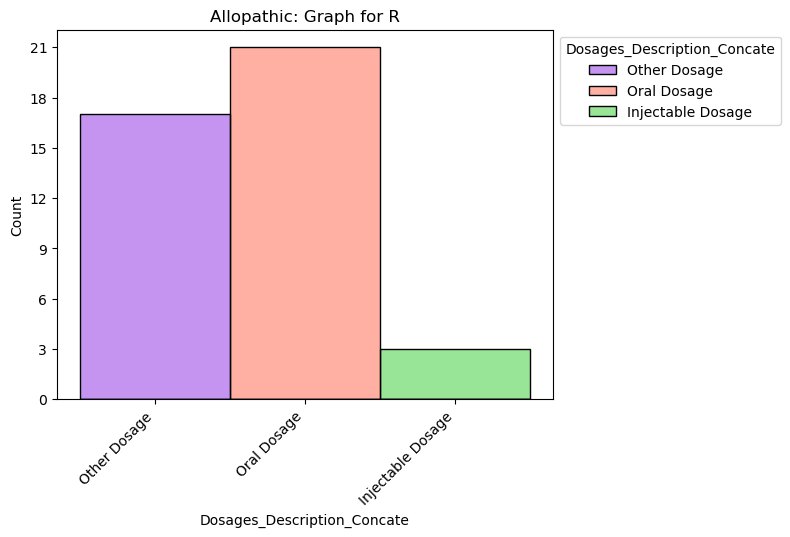

In [10]:
# Unique colors for each description
custom_colors = {
    'Oral Dosage': '#FF6347',
    'Topical Dosage': '#4682B4',
    'Injectable Dosage': '#32CD32',
    'Inhalation Dosage': '#FFD700',
    'Other Dosage': '#8A2BE2',
    'Unknown' : '#DC143C'
}

# Plots a stacked histogram for Allopathic
plot = sns.histplot(Allopathic, x='Use For', hue = "Dosages_Description_Concate", stat = 'count',multiple = "stack", palette = custom_colors)
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plt.title("Allopathic")
plt.show()

# Creates a new graph for each category in Use for (Human, vets, and R) for more readablilty
for category in Allopathic['Use For'].unique():
    Allopathic_unique = Allopathic[Allopathic["Use For"] == category]
    plot = sns.histplot(Allopathic_unique, x = 'Dosages_Description_Concate', hue = "Dosages_Description_Concate", stat = 'count', palette = custom_colors)
    sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Allopathic: Graph for {category}')
    plt.xticks(rotation = 45, ha = 'right')
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.show()

# Making multiple graphs for use for but less readable than above
# hist_multi= sns.displot(Allopathic, x = 'Dosages_Description_Concate', col = 'Use For', hue = "Dosages_Description_Concate" ,palette = custom_colors)
# for ax in hist_multi.axes.flat:
#     ax.set_xticks(ax.get_xticks())
#     ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')

# plt.show()

Use For: The medical use or indication of the drug (e.g., pain relief, antibiotics, etc.) - From the Kaggle Website

Human -
Huge ammounts of orally taken medication. 
It does seem like only humans have the inhallation dosage in this portion of the dataset.

Veterinary - 
It seems to have a lot of unknown which is : Solution, Powder, Liquid. Would probably need more understanding for which one does what for the specific medicine.
The other category seems to be high although that could be a failure on my part for the data cleaning, when selecting which category goes where. I just didn't want to spend to much time on it.

R - 
I believe this is supposed to repersent relief medication, after looking at some and what the kaggle website says.

In [11]:
Ayurvedic["Dosages Description"].unique()

array(['Capsule', 'Liquid', 'Oil (Liquid)', 'Semi-Solid', 'Ointment',
       'Kwath', 'Powder', 'Syrup', 'Tablet', 'Modak', 'Cream', 'Malam',
       'Hand Sanitizer', 'Khar/Lavan', 'Ghrita', 'Lotion', 'Arka', 'Gel',
       'Mouth Wash', 'Dust', 'Guggulu', 'Khar', 'Solid', 'Halua'],
      dtype=object)

In [12]:
Herbal["Dosages Description"].unique()

array(['Tablet', 'Capsule', 'Powder', 'Syrup', 'Soap Bar', 'Mouth Wash',
       'Ointment', 'Soft Gelatin Capsule', 'Oral Rinse',
       'Effervescent Granules', 'Liquid', 'Oil (Liquid)', 'Toothpaste',
       'Gel', 'Granules', 'Powder for Suspension', 'Cream', 'Lotion',
       'Muscle Rub', 'Pediatric Drops', 'Shampoo', 'Drops',
       'Effervescent Tablet', 'Hand Wash', 'Face Wash', 'ORS'],
      dtype=object)

In [13]:
Homeopathic["Dosages Description"].unique()

array(['Liquid', 'Tablet', 'Syrup', 'Drops', 'Ointment', 'Cream',
       'Oil (Liquid)', 'Solid', 'Powder', 'Capsule', 'Semi-Solid', 'Pill',
       'Oral Spray', 'Oral Liquid', 'Arka'], dtype=object)

In [14]:
Unani["Dosages Description"].unique()


array(['Liquid', 'Tablet', 'Capsule', 'Powder', 'Semi-Solid', 'Malam',
       'Cream', 'Oil (Liquid)', 'Ointment', 'Lozenge', 'Halua', 'Syrup',
       'Shampoo', 'Hand Sanitizer', 'Morham', 'Modak', 'Arka',
       'Khar/Lavan', 'ORS'], dtype=object)